In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

In [2]:
# opening secret keys from the secret.json file
with open('secret.json') as f:
    data = json.load(f)

client_id = data['client_id']
secret = data['secret']

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
genres = ["rock", "metal", "grunge", "pop", "hip-hop", "rap", "blues", "r&b", "reggae", "mambo", "latin", "country", "opera", "classical", "jazz", "folk", "accoustic", "disco", "edm", "electronic", "house", "techno", "synthwave"]

data = []
for genre in genres:
    playlists = sp.search(q=genre, type="playlist")
    tracks = sp.playlist_tracks(playlists["playlists"]["items"][0]["id"])["items"]
    track_features = []
    for track in tracks:
        features = sp.audio_features(track["track"]["id"])
        song_name = track["track"]["name"]
        artist_name = track["track"]["artists"][0]["name"]
        year = track["track"]["album"]["release_date"].split("-")[0]
        features[0]["year"] = year
        features[0]["song_name"] = song_name
        features[0]["artist_name"] = artist_name
        features[0]["genre"] = genre
        track_features.append(features[0])
    data.extend(track_features)

In [5]:
# features into a pandas dataframe
df = pd.DataFrame(data)

In [6]:
# converting data to dataframe
df = df.drop(["type","uri","track_href","analysis_url"], axis=1)

In [7]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,year,song_name,artist_name,genre
0,0.437,0.965,4,-4.448,1,0.1360,0.326000,0.000280,0.1440,0.766,172.428,6HMFtoMvv6n6Q2eOyPFyne,248893,4,1985,Walk Of Life,Dire Straits,rock
1,0.653,0.730,5,-10.613,1,0.0429,0.011500,0.000010,0.0776,0.894,108.709,4JfuiOWlWCkjP6OKurHjSn,220311,4,1975,Walk This Way,Aerosmith,rock
2,0.741,0.697,0,-7.028,1,0.0277,0.066400,0.000023,0.1330,0.774,116.109,2LawezPeJhN4AWuSB0GtAU,160133,4,1970,Have You Ever Seen The Rain,Creedence Clearwater Revival,rock
3,0.574,0.913,6,-4.793,0,0.1330,0.061000,0.001580,0.1560,0.423,115.728,2zYzyRzz6pRmhPzyfMEC8s,208400,4,1979,Highway to Hell,AC/DC,rock
4,0.429,0.631,4,-11.514,0,0.0769,0.000078,0.004110,0.1750,0.376,162.734,1jzDzZWeSDBg5fhNc3tczV,168440,4,1970,Paranoid,Black Sabbath,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,0.782,0.640,5,-13.522,0,0.0906,0.013200,0.889000,0.1060,0.114,104.998,4jKPPZtGeSxUv7JW4s0Vxo,212638,4,2018,Lullaby,LukHash,synthwave
1579,0.233,0.885,8,-5.922,0,0.0554,0.000009,0.881000,0.3270,0.356,200.085,73SAmV0OiYoeTchoqwIVN3,260100,4,2020,Falling Down,LukHash,synthwave
1580,0.226,0.708,2,-7.163,0,0.0488,0.001300,0.242000,0.1380,0.164,159.445,2Ds8wv1wKwEjb3Eaf79Pfh,232846,3,2020,You and I,LukHash,synthwave
1581,0.491,0.954,9,-3.518,0,0.0879,0.010100,0.006600,0.3340,0.383,126.009,7ECOFXTdxfttpX3spcFb9s,208576,4,2015,Another World,LukHash,synthwave


In [8]:
# features to use for clustering
# X = df[["danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]]
X = df[["energy", "instrumentalness", "speechiness"]]
# X = df[["energy", "tempo", "speechiness"]]

In [9]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

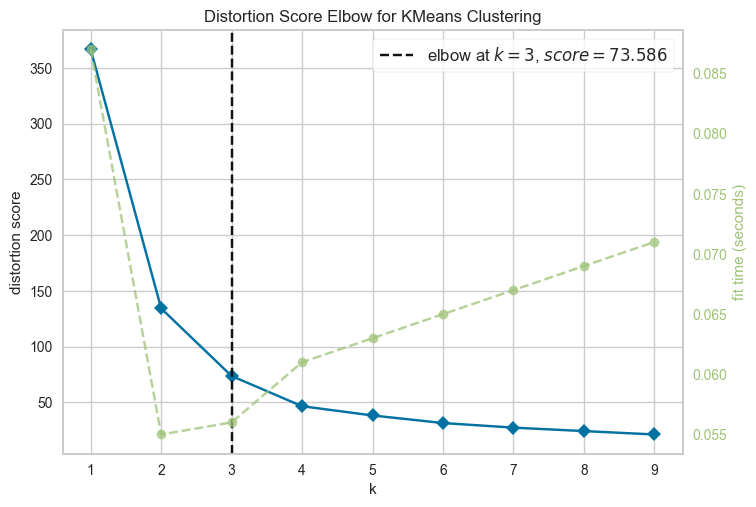

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# trying to get a good k with elbow
visualizer = KElbowVisualizer(KMeans(n_init=10), k=(1,10))
visualizer.fit(X)
visualizer.show()

In [11]:
# dimensionality reduction using PCA
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X_scaled)

In [12]:
# clustering using K-Means
kmeans = KMeans(n_clusters=3, n_init=10).fit(X)

In [13]:
df['cluster'] = kmeans.labels_

In [14]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,year,song_name,artist_name,genre,cluster
0,0.437,0.965,4,-4.448,1,0.1360,0.326000,0.000280,0.1440,0.766,172.428,6HMFtoMvv6n6Q2eOyPFyne,248893,4,1985,Walk Of Life,Dire Straits,rock,1
1,0.653,0.730,5,-10.613,1,0.0429,0.011500,0.000010,0.0776,0.894,108.709,4JfuiOWlWCkjP6OKurHjSn,220311,4,1975,Walk This Way,Aerosmith,rock,1
2,0.741,0.697,0,-7.028,1,0.0277,0.066400,0.000023,0.1330,0.774,116.109,2LawezPeJhN4AWuSB0GtAU,160133,4,1970,Have You Ever Seen The Rain,Creedence Clearwater Revival,rock,1
3,0.574,0.913,6,-4.793,0,0.1330,0.061000,0.001580,0.1560,0.423,115.728,2zYzyRzz6pRmhPzyfMEC8s,208400,4,1979,Highway to Hell,AC/DC,rock,1
4,0.429,0.631,4,-11.514,0,0.0769,0.000078,0.004110,0.1750,0.376,162.734,1jzDzZWeSDBg5fhNc3tczV,168440,4,1970,Paranoid,Black Sabbath,rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,0.782,0.640,5,-13.522,0,0.0906,0.013200,0.889000,0.1060,0.114,104.998,4jKPPZtGeSxUv7JW4s0Vxo,212638,4,2018,Lullaby,LukHash,synthwave,0
1579,0.233,0.885,8,-5.922,0,0.0554,0.000009,0.881000,0.3270,0.356,200.085,73SAmV0OiYoeTchoqwIVN3,260100,4,2020,Falling Down,LukHash,synthwave,0
1580,0.226,0.708,2,-7.163,0,0.0488,0.001300,0.242000,0.1380,0.164,159.445,2Ds8wv1wKwEjb3Eaf79Pfh,232846,3,2020,You and I,LukHash,synthwave,1
1581,0.491,0.954,9,-3.518,0,0.0879,0.010100,0.006600,0.3340,0.383,126.009,7ECOFXTdxfttpX3spcFb9s,208576,4,2015,Another World,LukHash,synthwave,1


In [15]:
# using pca=3, 3d plot
# df, x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
# labels={"x": "acousticness", "y": "instrumentalness", "z": "speechiness"}

fig = px.scatter_3d(
    df, x=df.energy, y=df.instrumentalness, z=df.speechiness,
    hover_data=["artist_name", "year"],
    color="cluster",
    symbol="genre",
    opacity=0.7,
    hover_name="song_name"
)

fig.update_layout(width=1920, height=1080)
fig.update_layout(legend=dict(orientation="v", yanchor="top", y=1.0, xanchor="left", x=0))
fig.update_traces(marker=dict(size=5, line=dict(width=1)))

         genre  countData  total  percentage (%)
0         rock          2    282            0.71
1        metal          6    282            2.13
2       grunge          7    282            2.48
3        mambo         19    282            6.74
4        opera         52    282           18.44
5         folk          1    282            0.35
6    accoustic          3    282            1.06
7        disco          5    282            1.77
8          edm         16    282            5.67
9   electronic         18    282            6.38
10       house         36    282           12.77
11      techno         58    282           20.57
12   synthwave         59    282           20.92
         genre  countData  total  percentage (%)
0         rock         48   1002            4.79
1        metal         44   1002            4.39
2       grunge         53   1002            5.29
3          pop         50   1002            4.99
4      hip-hop         50   1002            4.99
5          rap      

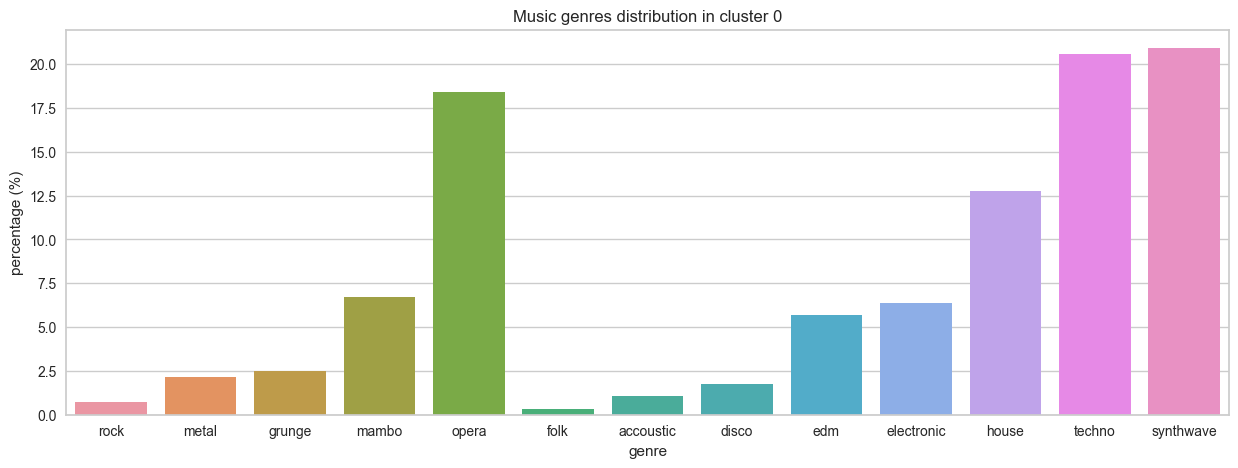

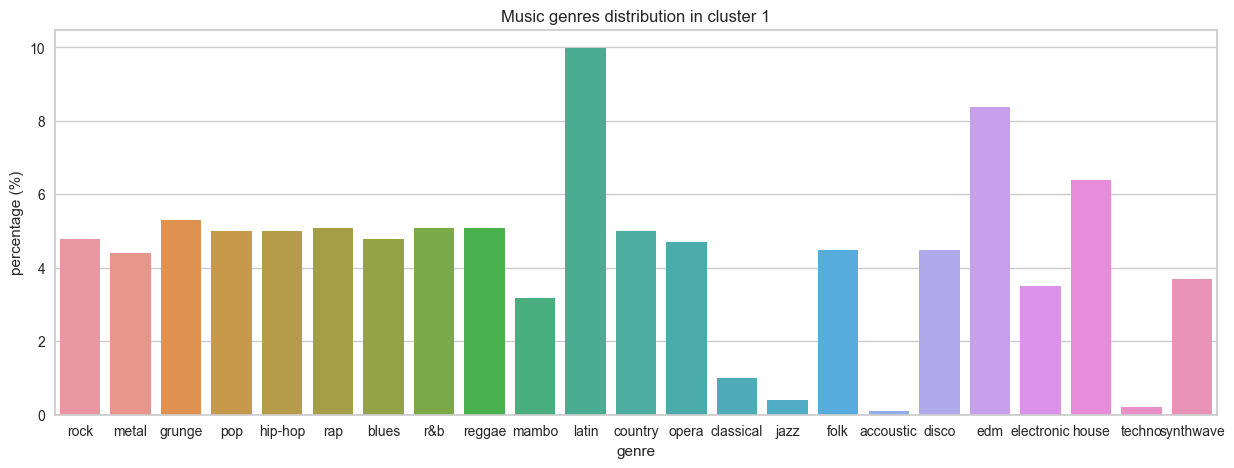

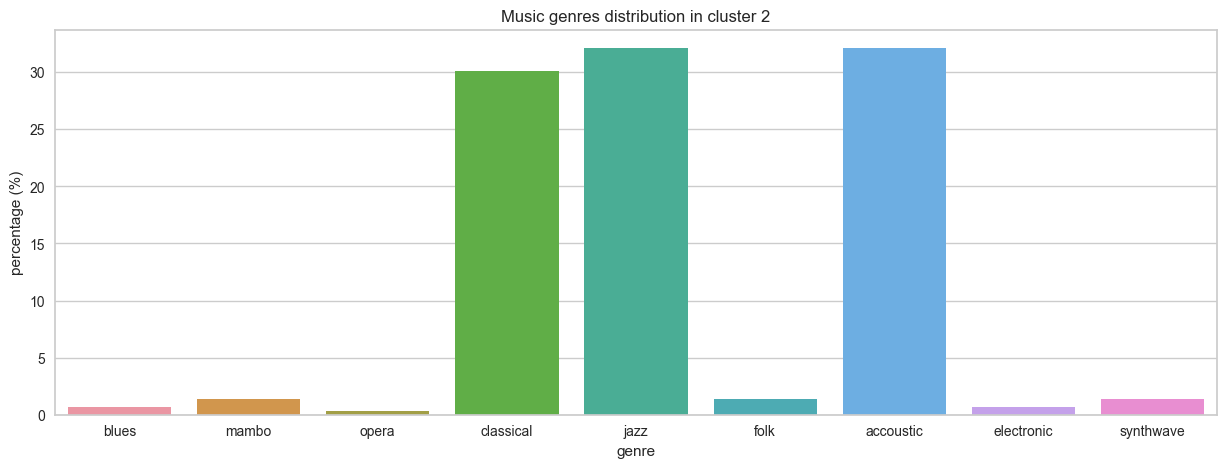

In [16]:
for i in sorted(df['cluster'].unique()):
    df0 = df.loc[df['cluster'] == i].copy(deep=True)
    df0['countData'] = df0.groupby("genre")["genre"].transform(lambda x: x.count())
    df1 = df0.filter(['genre','countData'], axis=1)
    df1 = df1.drop_duplicates()
    df1['total'] = df1['countData'].sum()
    df1['percentage (%)'] = ((df1.countData / df1.total)*100).round(2)
    df1 = df1.reset_index(drop = True)
    print(df1)
    plt.figure(figsize=(15,5))
    graph = sns.barplot(data=df1, x="genre", y="percentage (%)").set(title = f"Music genres distribution in cluster {i}")

In [29]:
group = df.groupby('cluster').agg(
    {"danceability":['mean'], 
     "energy":['mean'],
     "loudness":['mean'],
     "speechiness":['mean'],
     "acousticness":['mean'],
     "instrumentalness":['mean'],
     "liveness":['mean'],
     "valence":['mean'],
     "tempo":['mean']}
     )

group

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,
0,0.636901,0.842564,-6.876262,0.065125,0.089713,0.750950,0.169268,0.372159,127.056298
1,0.642280,0.704238,-7.155487,0.091582,0.198217,0.033910,0.176916,0.535540,120.581021
2,0.472263,0.186235,-18.017625,0.047732,0.879255,0.840742,0.123364,0.237566,110.614227


In [18]:
df.groupby(["cluster"])["genre"].agg(pd.Series.mode).to_frame()

,genre
cluster,
0,synthwave
1,latin
2,"[accoustic, jazz]"


In [34]:
# recommendation for: study, training or anything

user_activity = input("Do you feel like studying? or training? or anything? (study/gym/anything):")
playlist_number = int(input("How many songs for this session's playlist (integer):"))

if user_activity == "study":
    sample_df = df[df["cluster"] == 2].sample(n=playlist_number, random_state=42)
    output_dict = {artist: song for artist, song in zip(sample_df['artist_name'], sample_df['song_name'])}
    print("Here's a list of songs for studying:")
    print()
    for artist, song in output_dict.items():
        print(f"{artist}: {song}")

elif user_activity == "gym":
    sample_df = df[df["cluster"] == 1].sample(n=playlist_number, random_state=42)
    output_dict = {artist: song for artist, song in zip(sample_df['artist_name'], sample_df['song_name'])}
    print("Here's a list of songs for the gym:")
    print()
    for artist, song in output_dict.items():
        print(f"{artist}: {song}")

else:
    sample_df = df[df["cluster"] == 0].sample(n=playlist_number, random_state=42)
    output_dict = {artist: song for artist, song in zip(sample_df['artist_name'], sample_df['song_name'])}
    print("Here's a list of songs for anything:")
    print()
    for artist, song in output_dict.items():
        print(f"{artist}: {song}")

Here's a list of songs for studying:

Guitar Tribute Players: Home
Sungha Jung: Englishman in New York
Jaden Berry: The Meadows
Ludwig van Beethoven: Symphony No. 6 in F Major, Op. 68 "Pastoral": I. Awakening of Cheerful Feelings Upon Arrival in the Country: Allegro ma non troppo
Wolfgang Amadeus Mozart: Mozart: Clarinet Concerto in A Major, K. 622: II. Adagio
Franz Schubert: Symphony No. 8 In B Minor, D.759 - "Unfinished": 1. Allegro moderato
Grayville Trio: Strangest Sea
Tito Puente: Mambo Gozon
Foster Davies: Romancing
The Groove Trio: Barney's
Nick Drake: Road
Rudy Winston: The Very Thought Of You
Soft Brush Touches: Vine Street
Antonio Vivaldi: The Four Seasons - Violin Concerto in F Minor, Op. 8 No. 4, RV 297 "Winter": I. Allegro non molto
Gabriel Fauré: Pelléas et Mélisande, Op. 80: 4. Sicilienne
Eternal Time Trio: Dolphin Dance
Al Fowler Trio: Prelude To A Kiss
Max Richter: Spring 1 - 2012
Tanner King Trio: Midnight Fairytale
Archie Taylor: Reverie
Madeleine West: Sometime Ago
